## Homework 2

Due: 2024-10-16 at 8:30 AM PT



# Name: Nolan Yager

For this assignment, you will practice downloadings, cleaning, and analyzing data from the [National Risk Index (NRI)](https://hazards.fema.gov/nri/) and the [CDC Social Vulnerability Index (SVI)](https://www.atsdr.cdc.gov/placeandhealth/svi/index.html).

# Preparation

1. Create a 'data' folder in the root directory of this repository.
1. Inside the 'data' folder, create a 'raw' folder.
1. Add and commit a '.gitignore' file to the root directory of this repository that excludes all contents of the 'data' folder.
1. Download the county-level NRI and SVI data for the entire United States. Place the data in the 'data/raw' folder.
1. In the repository README, provide a brief (1-2 sentence) description of each file in the 'data' folder and a link to the original source of the data.

Pre-work: loading packages and checking working directory 

In [1]:
# Import Packages Test: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Current WD:
import os
cwd = os.getcwd()
print(cwd)




c:\Users\nyager\Desktop\YagerMLCode\MachineLearning_Fall24\homework


Task 1 - NRI Data Cleaning

1. Import the NRI data. Ensure that the [FIPS code](https://en.wikipedia.org/wiki/Federal_Information_Processing_Standard_state_code) variable ('STCOFIPS') is correctly identified as a string / character variable. Otherwise, the leading zeros will be removed.

In [5]:
# Loading NRI data and specifying STCOFIPS as a string column
nri_data = pd.read_csv("data/raw/NRI_Data_By_County.csv", dtype={'STCOFIPS': str})

# Here, we check if the State-County FIPS code (STCOFIPS) was loaded correctly
print(nri_data.dtypes)  # Verify if 'STCOFIPS' is treated as an object (string)
second_value = nri_data['STCOFIPS'].iloc[1]
if isinstance(second_value, str):
    print("yes Nolan, it's a string")
else:
    print("no Nolan, it isn't a string")
    


OID_                int64
NRI_ID             object
STATE              object
STATEABBRV         object
STATEFIPS           int64
                   ...   
WNTW_ALR_NPCTL    float64
WNTW_RISKV        float64
WNTW_RISKS        float64
WNTW_RISKR         object
NRI_VER            object
Length: 465, dtype: object
yes Nolan, it's a string



2. Subset the NRI data to include only the 5-digit state/county FIPS code and all colums ending with '\_AFREQ' and '\_RISKR'. Each of these columns represents a different hazard type.


In [6]:
# Subsetting: 
columns_to_keep = ['STCOFIPS'] + [col for col in nri_data.columns if col.endswith('_AFREQ') or col.endswith('_RISKR')]
nri_subset = nri_data[columns_to_keep]

# Looking at first 5 rows to check: 
print(nri_subset.head(5))


  STCOFIPS  AVLN_AFREQ      AVLN_RISKR  CFLD_AFREQ      CFLD_RISKR  \
0    01001         NaN  Not Applicable         NaN  Not Applicable   
1    01003         NaN  Not Applicable    3.684142  Relatively Low   
2    01005         NaN  Not Applicable         NaN  Not Applicable   
3    01007         NaN  Not Applicable         NaN  Not Applicable   
4    01009         NaN  Not Applicable         NaN  Not Applicable   

   CWAV_AFREQ CWAV_RISKR  DRGT_AFREQ           DRGT_RISKR  ERQK_AFREQ  ...  \
0         0.0  No Rating   25.969774       Relatively Low    0.000431  ...   
1         0.0  No Rating   12.353442  Relatively Moderate    0.000338  ...   
2         0.0  No Rating   43.956953       Relatively Low    0.000227  ...   
3         0.0  No Rating   28.894501             Very Low    0.000790  ...   
4         0.0  No Rating   28.152598       Relatively Low    0.000817  ...   

  TRND_AFREQ           TRND_RISKR TSUN_AFREQ         TSUN_RISKR VLCN_AFREQ  \
0   0.480184  Relatively Moderat


3. Create a table / dataframe that, for each hazard type, shows the number of missing values in the '\_AFREQ' and '\_RISKR' columns.


In [7]:
# Creating a dataframe:  
afreq_riskr_columns = [col for col in nri_subset.columns if col.endswith('_AFREQ') or col.endswith('_RISKR')]
missing_values_nri = nri_subset[afreq_riskr_columns].isna().sum()

# Table: 
summary_table_missing = pd.DataFrame({
    'Hazard_Type': missing_values_nri.index, 
    'Missing_Values': missing_values_nri.values
})

# Print Table: 
print(summary_table_missing)

   Hazard_Type  Missing_Values
0   AVLN_AFREQ            3023
1   AVLN_RISKR               0
2   CFLD_AFREQ            2646
3   CFLD_RISKR               0
4   CWAV_AFREQ               0
5   CWAV_RISKR               0
6   DRGT_AFREQ               7
7   DRGT_RISKR               0
8   ERQK_AFREQ               0
9   ERQK_RISKR               0
10  HAIL_AFREQ               7
11  HAIL_RISKR               0
12  HWAV_AFREQ               0
13  HWAV_RISKR               0
14  HRCN_AFREQ             918
15  HRCN_RISKR               0
16  ISTM_AFREQ             229
17  ISTM_RISKR               0
18  LNDS_AFREQ              40
19  LNDS_RISKR               0
20  LTNG_AFREQ             123
21  LTNG_RISKR               0
22  RFLD_AFREQ               0
23  RFLD_RISKR               0
24  SWND_AFREQ               7
25  SWND_RISKR               0
26  TRND_AFREQ               7
27  TRND_RISKR               0
28  TSUN_AFREQ            3103
29  TSUN_RISKR               0
30  VLCN_AFREQ            3125
31  VLCN

4. Create a new column in the original data table indicating whether or not 'AVLN_AFREQ' is missing or observed. Show the cross-tabulation of the 'AVLN_AFREQ' missingness and 'AVLN_RISKR' columns (including missing values). What do you observe?

In [8]:
# Create a new column 
nri_data['AVLN_AFREQ_Missing'] = nri_data['AVLN_AFREQ'].isna()

# Cross-tab set up
cross_tab = pd.crosstab(nri_data['AVLN_AFREQ_Missing'], nri_data['AVLN_RISKR'], dropna=False)

# Printing
print(cross_tab)

AVLN_RISKR          Not Applicable  Relatively High  Relatively Low  \
AVLN_AFREQ_Missing                                                    
False                            0               15              52   
True                          3023                0               0   

AVLN_RISKR          Relatively Moderate  Very High  Very Low  
AVLN_AFREQ_Missing                                            
False                                33          9        99  
True                                  0          0         0  


5. Assuming that a risk that is "not applicable" to a county has an annualized frequency of 0, impute the relevant missing values in the '\_AFREQ' columns with 0.

In [9]:
# Selecting _AFREQ columns 
afreq_columns = [col for col in nri_data.columns if col.endswith('_AFREQ')]

# Filling missing values with 0s 
nri_data[afreq_columns] = nri_data[afreq_columns].fillna(0)

# Printing to see if it worked
print(nri_data[afreq_columns].isna().sum())


AVLN_AFREQ    0
CFLD_AFREQ    0
CWAV_AFREQ    0
DRGT_AFREQ    0
ERQK_AFREQ    0
HAIL_AFREQ    0
HWAV_AFREQ    0
HRCN_AFREQ    0
ISTM_AFREQ    0
LNDS_AFREQ    0
LTNG_AFREQ    0
RFLD_AFREQ    0
SWND_AFREQ    0
TRND_AFREQ    0
TSUN_AFREQ    0
VLCN_AFREQ    0
WFIR_AFREQ    0
WNTW_AFREQ    0
dtype: int64


Task 2 - SVI Data Cleaning

1. Import the SVI data. Ensure that the FIPS code is correctly identified as a string / character variable. Otherwise, the leading zeros will be removed.

In [10]:
# Loading SVI data and telling python FIPS is a string 
svi_data = pd.read_csv("data/raw/SVI_2022_Data_By_County.csv", dtype={'FIPS': str})

2. Subset the SVI data to include only the following columns:
`ST, STATE, ST_ABBR, STCNTY, COUNTY, FIPS, LOCATION, AREA_SQMI, E_TOTPOP, EP_POV150, EP_UNEMP, EP_HBURD, EP_NOHSDP, EP_UNINSUR, EP_AGE65, EP_AGE17, EP_DISABL, EP_SNGPNT, EP_LIMENG, EP_MINRTY, EP_MUNIT, EP_MOBILE, EP_CROWD, EP_NOVEH, EP_GROUPQ, EP_NOINT, EP_AFAM, EP_HISP, EP_ASIAN, EP_AIAN, EP_NHPI, EP_TWOMORE, EP_OTHERRACE`

In [11]:
# Subsetting SVI data
columns_to_keep = [
    'ST', 'STATE', 'ST_ABBR', 'STCNTY', 'COUNTY', 'FIPS', 'LOCATION', 'AREA_SQMI',
    'E_TOTPOP', 'EP_POV150', 'EP_UNEMP', 'EP_HBURD', 'EP_NOHSDP', 'EP_UNINSUR', 
    'EP_AGE65', 'EP_AGE17', 'EP_DISABL', 'EP_SNGPNT', 'EP_LIMENG', 'EP_MINRTY', 
    'EP_MUNIT', 'EP_MOBILE', 'EP_CROWD', 'EP_NOVEH', 'EP_GROUPQ', 'EP_NOINT', 
    'EP_AFAM', 'EP_HISP', 'EP_ASIAN', 'EP_AIAN', 'EP_NHPI', 'EP_TWOMORE', 'EP_OTHERRACE'
]

# Creating the subset: 
svi_subset = svi_data[columns_to_keep]


3. Create a table / dataframe that shows the number of missing values in each column.

In [12]:
# Seeing which values are missing by each column in a dataframe: 
missing_values_svi = svi_subset.isna().sum().reset_index()
missing_values_svi.columns = ['Columns', 'Missing_Values_SVI'] 

# Printing
print(missing_values_svi)

         Columns  Missing_Values_SVI
0             ST                   0
1          STATE                   0
2        ST_ABBR                   0
3         STCNTY                   0
4         COUNTY                   0
5           FIPS                   0
6       LOCATION                   0
7      AREA_SQMI                   0
8       E_TOTPOP                   0
9      EP_POV150                   0
10      EP_UNEMP                   0
11      EP_HBURD                   0
12     EP_NOHSDP                   0
13    EP_UNINSUR                   0
14      EP_AGE65                   0
15      EP_AGE17                   0
16     EP_DISABL                   0
17     EP_SNGPNT                   0
18     EP_LIMENG                   0
19     EP_MINRTY                   0
20      EP_MUNIT                   0
21     EP_MOBILE                   0
22      EP_CROWD                   0
23      EP_NOVEH                   0
24     EP_GROUPQ                   0
25      EP_NOINT                   0
2

Task 3 - Data Merging
1a. Identify any FIPS codes that are present in the NRI data but not in the SVI data and vice versa.

In [13]:
# Extracting both FIPS codes as sets: 
nri_fips = set(nri_subset['STCOFIPS'])
svi_fips = set(svi_subset['FIPS'])

# FIPS in NRI, but not in SVI data: 
fips_in_nri_not_svi = nri_fips - svi_fips

# Vice versa: FIPS in SVI, but not in NRI: 
fips_in_svi_not_nri = svi_fips - nri_fips

# Printing both: 
print(f"FIPS codes in NRI but not in SVI: {fips_in_nri_not_svi}")
print(f"FIPS codes in SVI but not in NRI: {fips_in_svi_not_nri}")

FIPS codes in NRI but not in SVI: {'69100', '66010', '09013', '72025', '78010', '72089', '72113', '72017', '72007', '72047', '72051', '72069', '72035', '72065', '72093', '72019', '72085', '72097', '72049', '72061', '72111', '72103', '72125', '72107', '72153', '72117', '72075', '72135', '09001', '72095', '72123', '72133', '72121', '72011', '69110', '72139', '72041', '60010', '72031', '72115', '72143', '09015', '72021', '72083', '72119', '72087', '69120', '60020', '72127', '72077', '72009', '72001', '72023', '78020', '72099', '72091', '72073', '72053', '72109', '72027', '72067', '72071', '09009', '72141', '72013', '72055', '72137', '72149', '72079', '09003', '72063', '72003', '72101', '72059', '72015', '09011', '72029', '78030', '72005', '72043', '09005', '72033', '72037', '72105', '72145', '72045', '72151', '72131', '72147', '60050', '72039', '72054', '09007', '72129', '72081', '72057'}
FIPS codes in SVI but not in NRI: {'09160', '09110', '09180', '09190', '09130', '09120', '09150', '09

1b. Describe any discrepancies and possible causes? 
Answer: There are quite a lot more FIPS codes in the NRI that are not in the SVI than FIPS codes that are in the SVI data, but not in the NRI data. I know from studying Congress that congressional boundaries change occasionally, perhaps this also happens with counties. I suppose it's possible that this data was collected in slightly different years, and in between the collection periods of each some county level boundaries changed. It's also possible that there is simply missing data due to collection issues, such as if there is no data available. Best case scenario, this was missing at random, worst case scenario, there is a systematic reason as to why it is missing. For instance, perhaps the data is missing in the SVI data specifically for counties that lack proper funding, which may be due to having residents with a lower economic status. 

1c. What do these discrepancies if any, mean for interpreting results based on the merged dataset moving forward?
Answer: as I mentioned above, if the missing data is missing NOT at random, that is, there is a systematic reason as to why it is missing, this could lead to biases in our future analyses. For example, above I noted that it's possible SVI data are missing for counties with lower socioeconomic status, which would lead to us having fewer counties with these characteristics. These types of counties would then be less represented in our analyses. 

2. Merge the NRI and SVI data on the FIPS code. Use an outer join to keep all counties in the final dataset.

In [14]:
# Renaming STCOFIPS in NRI to FIPS (simpler, aligned with SVI data)
nri_subset = nri_subset.rename(columns={'STCOFIPS': 'FIPS'})

# Perform outer join on the FIPS code 
nri_svi_merged = pd.merge(nri_subset, svi_subset, on='FIPS', how='outer')

# Printing it to check: 
print(nri_svi_merged.head())

    FIPS  AVLN_AFREQ      AVLN_RISKR  CFLD_AFREQ      CFLD_RISKR  CWAV_AFREQ  \
0  01001         NaN  Not Applicable         NaN  Not Applicable         0.0   
1  01003         NaN  Not Applicable    3.684142  Relatively Low         0.0   
2  01005         NaN  Not Applicable         NaN  Not Applicable         0.0   
3  01007         NaN  Not Applicable         NaN  Not Applicable         0.0   
4  01009         NaN  Not Applicable         NaN  Not Applicable         0.0   

  CWAV_RISKR  DRGT_AFREQ           DRGT_RISKR  ERQK_AFREQ  ... EP_NOVEH  \
0  No Rating   25.969774       Relatively Low    0.000431  ...      4.0   
1  No Rating   12.353442  Relatively Moderate    0.000338  ...      2.3   
2  No Rating   43.956953       Relatively Low    0.000227  ...     11.7   
3  No Rating   28.894501             Very Low    0.000790  ...      7.5   
4  No Rating   28.152598       Relatively Low    0.000817  ...      4.8   

   EP_GROUPQ EP_NOINT  EP_AFAM EP_HISP  EP_ASIAN EP_AIAN  EP_NHPI EP

3. Create a table / dataframe that shows the number of missing values in each column of the merged dataset.

In [15]:
# Creating a dataframe showing the number of missing values 
missing_values_merged = nri_svi_merged.isna().sum().reset_index()
missing_values_merged.columns = ['Column', 'Missing_Values_Merged']

# Previewing it: 
print(missing_values_merged)

          Column  Missing_Values_Merged
0           FIPS                      0
1     AVLN_AFREQ                   3032
2     AVLN_RISKR                      9
3     CFLD_AFREQ                   2655
4     CFLD_RISKR                      9
..           ...                    ...
64      EP_ASIAN                     96
65       EP_AIAN                     96
66       EP_NHPI                     96
67    EP_TWOMORE                     96
68  EP_OTHERRACE                     96

[69 rows x 2 columns]


Task 4 - Data Analysis

1. For each numerical variable in the merged dataset, plot a histogram showing the distribution of values.
(Hint: write a function to make the histogram for a single variable, then use a loop or apply function to make the histograms for all numerical variables.)

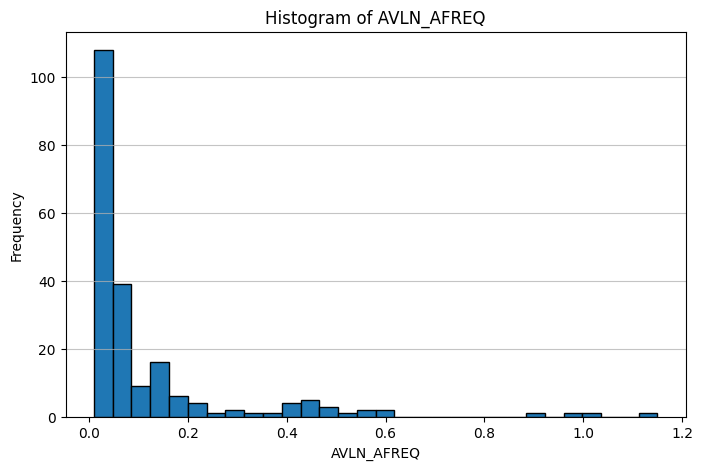

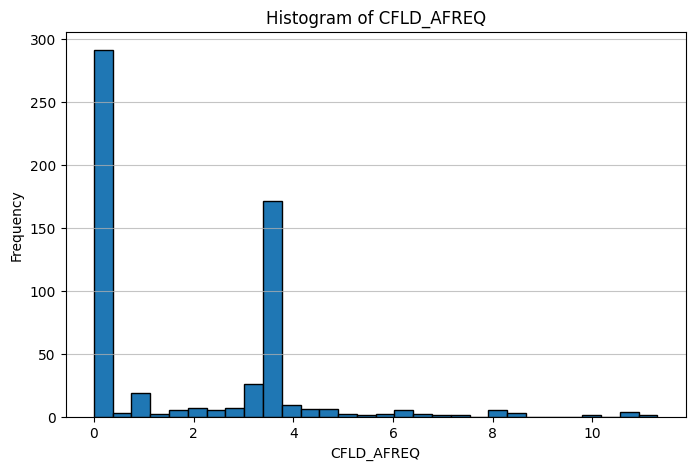

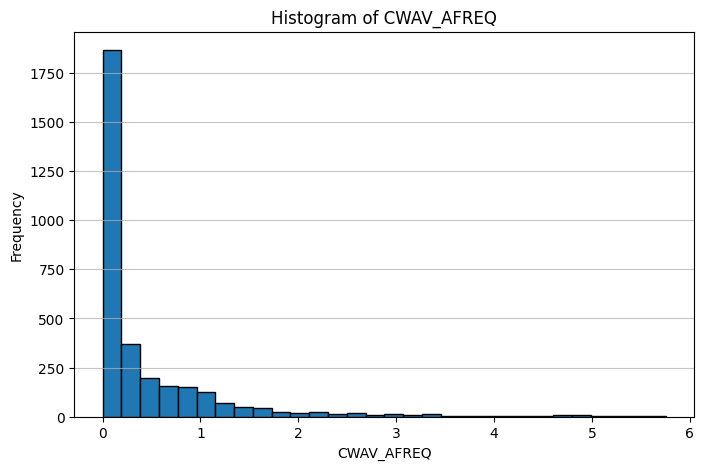

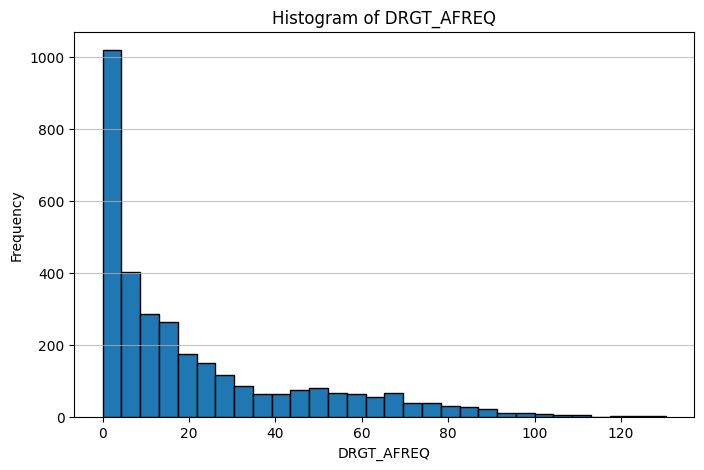

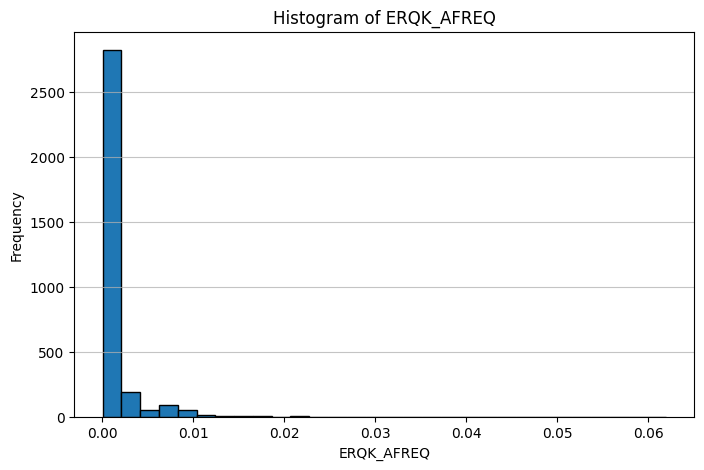

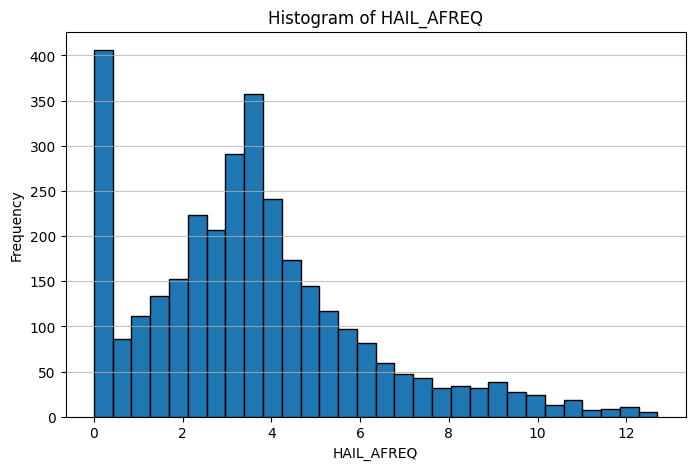

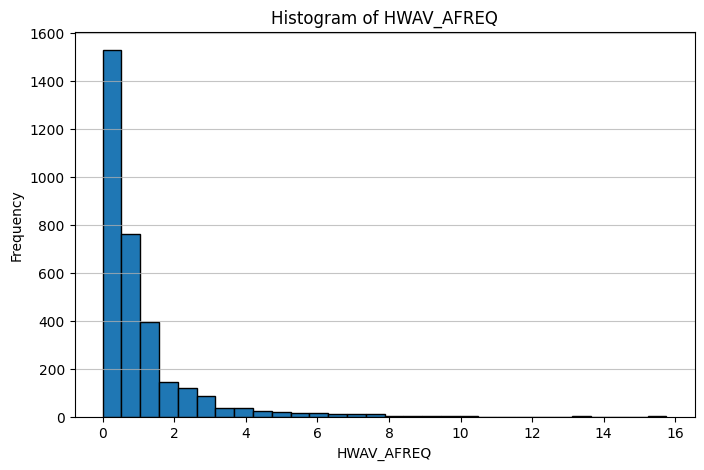

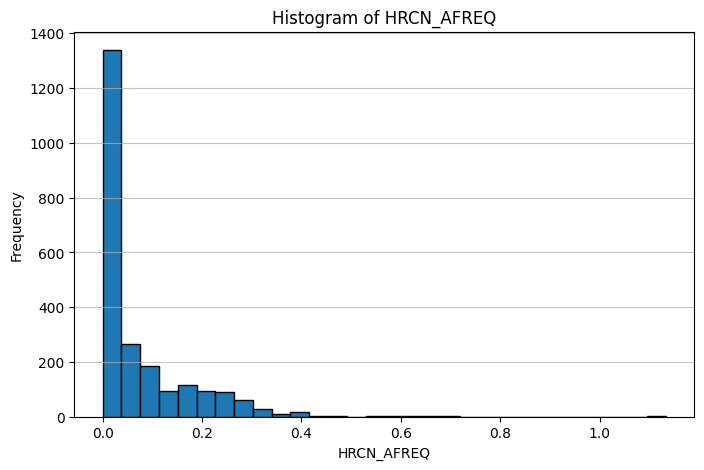

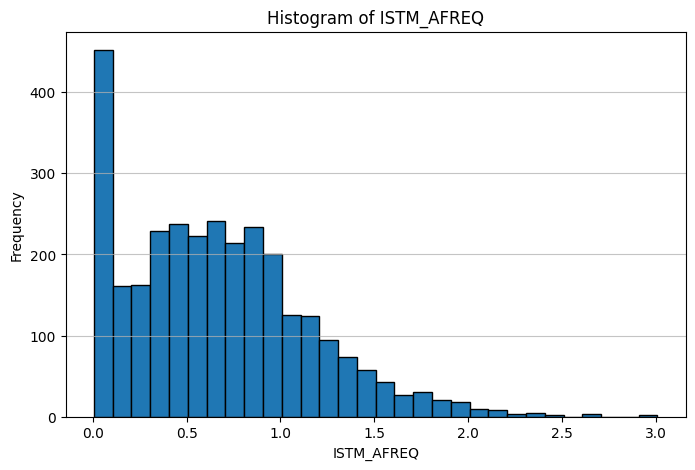

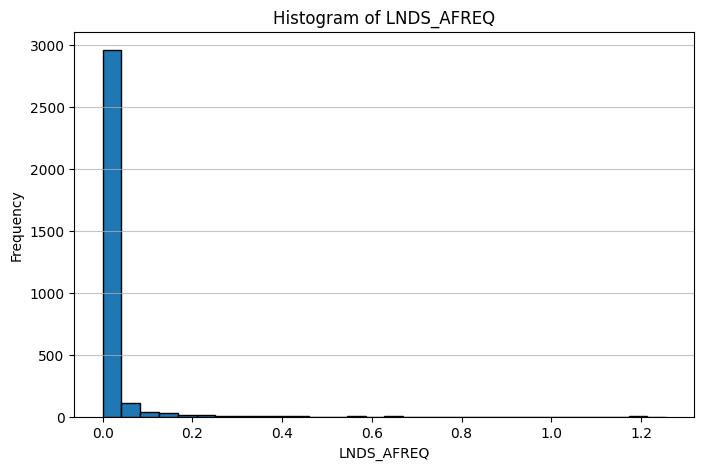

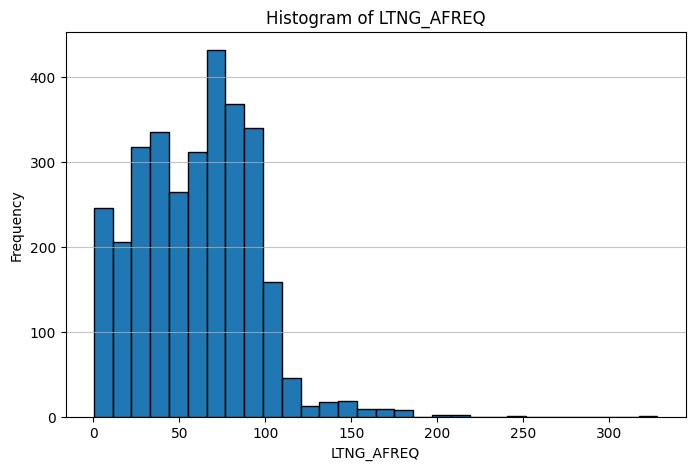

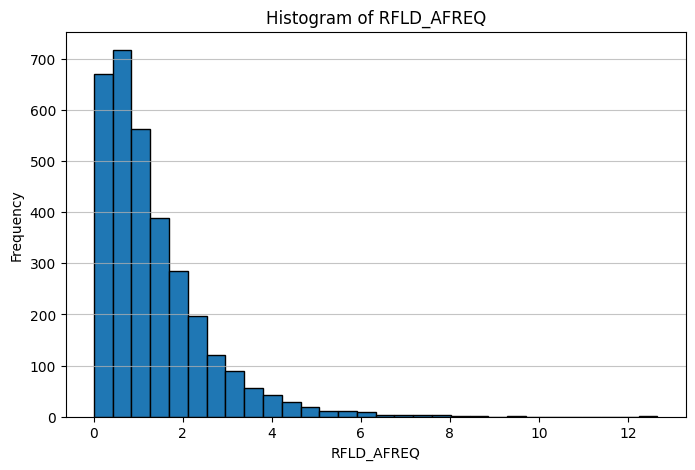

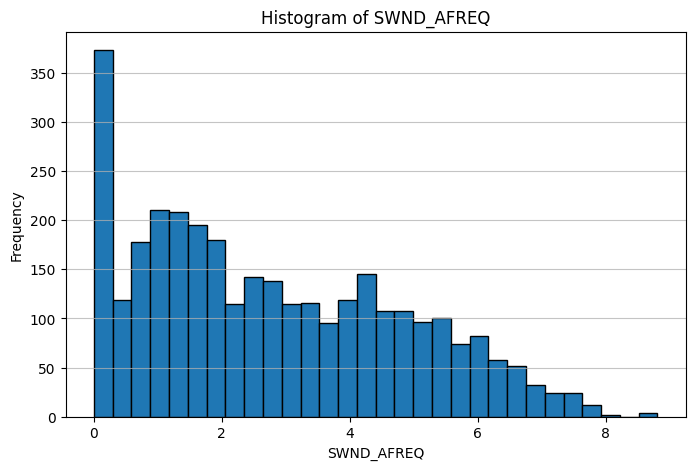

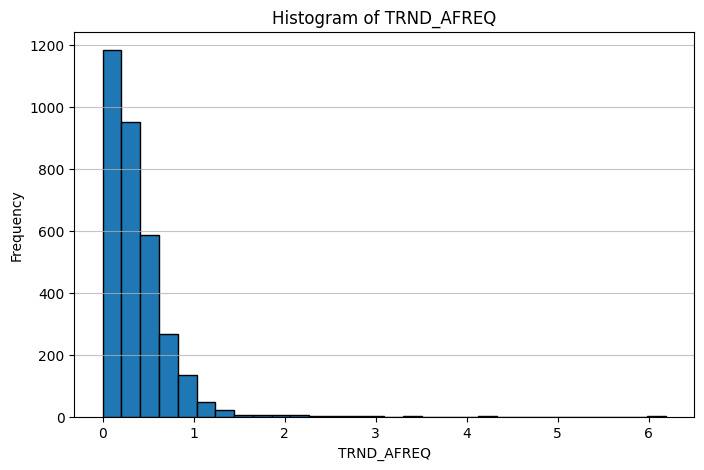

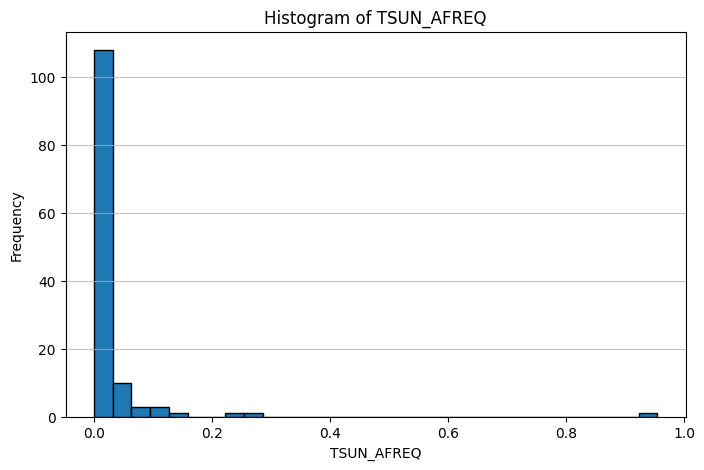

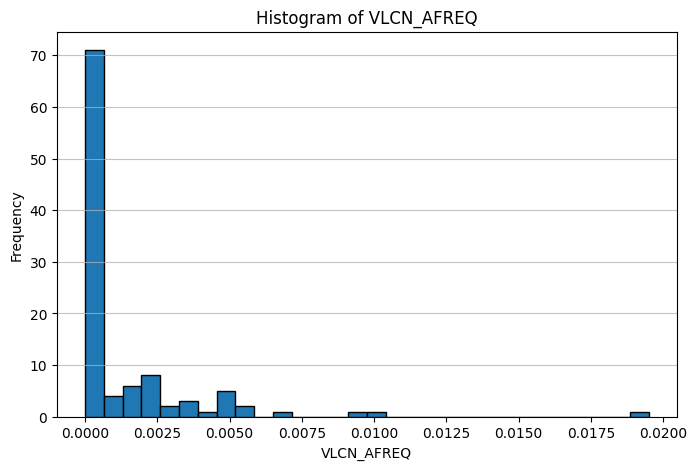

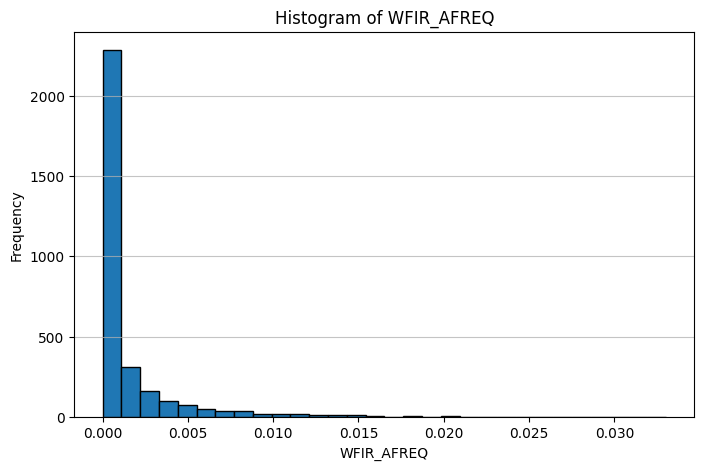

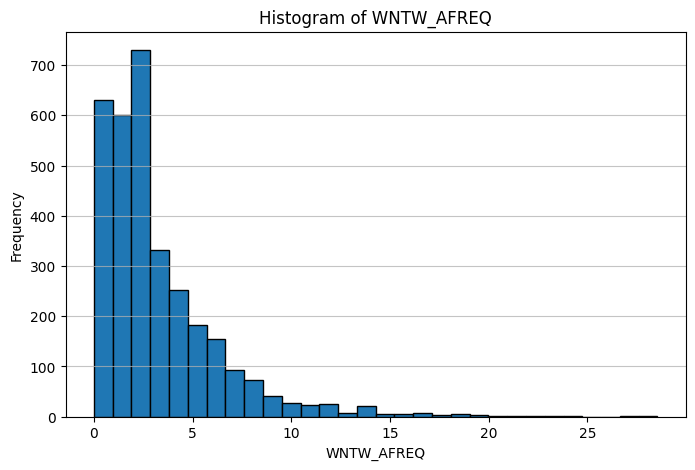

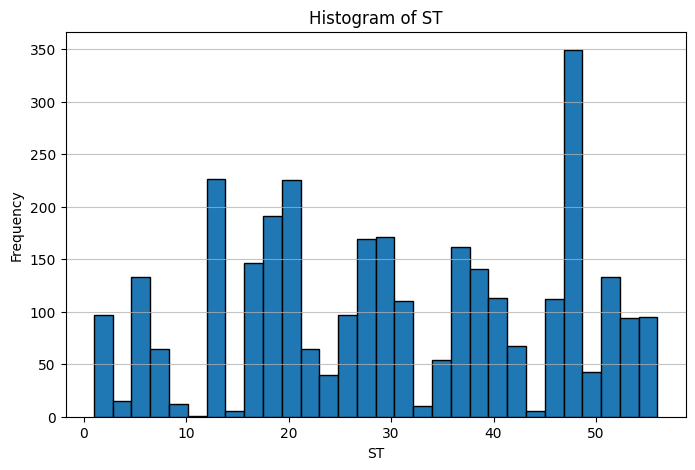

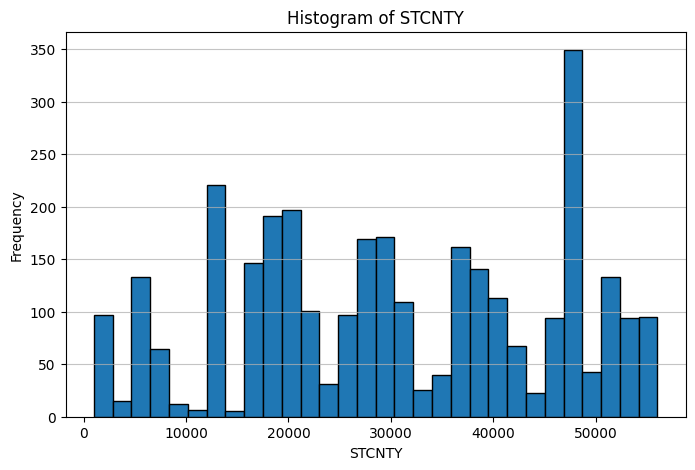

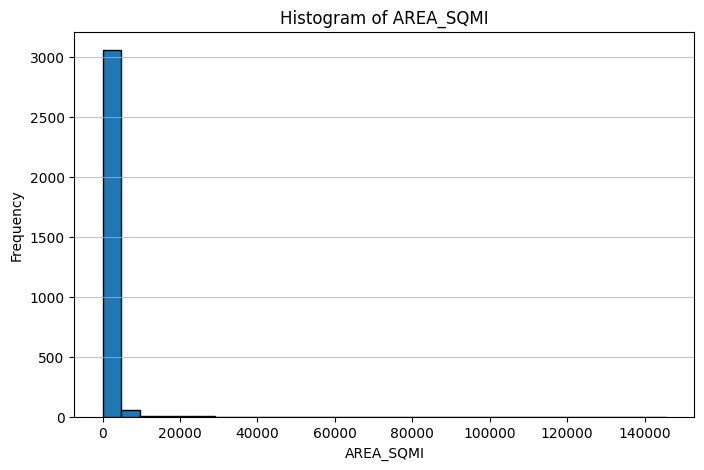

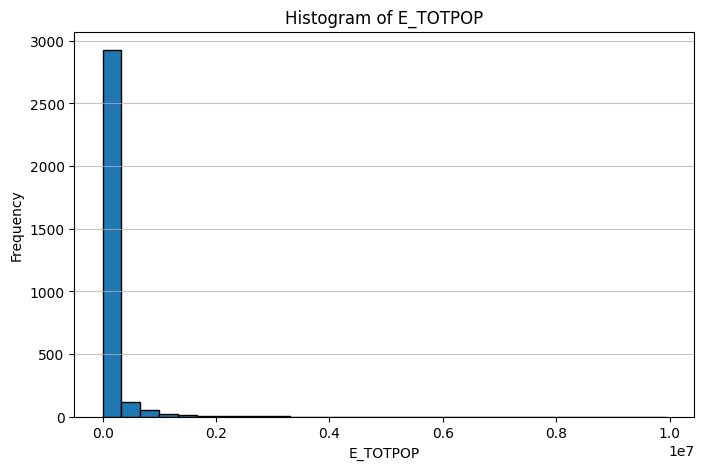

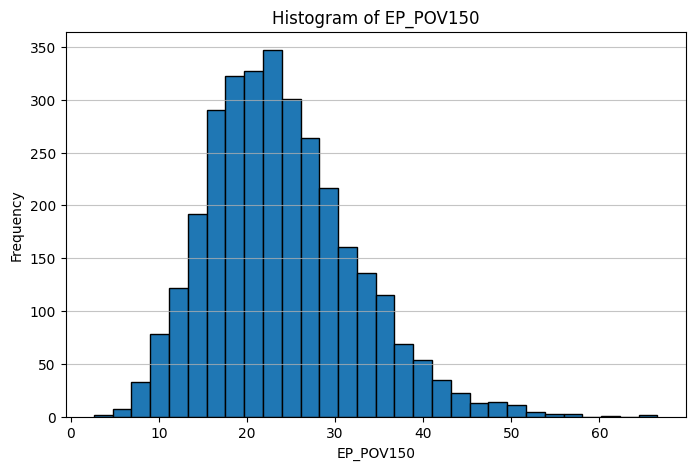

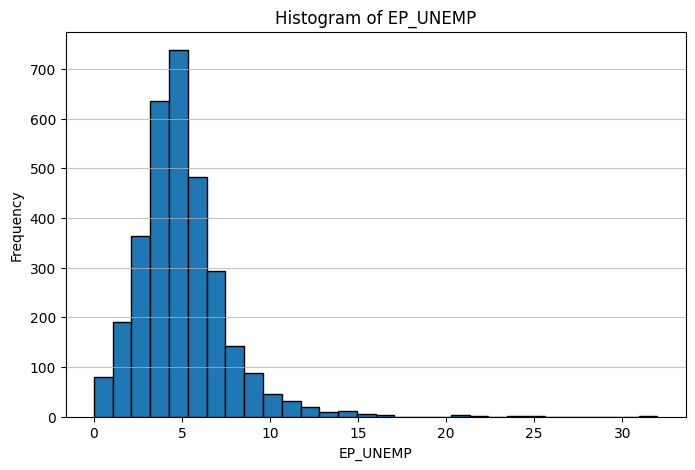

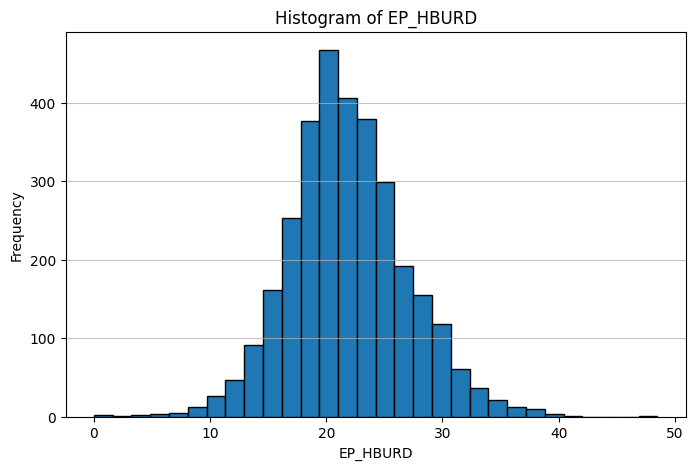

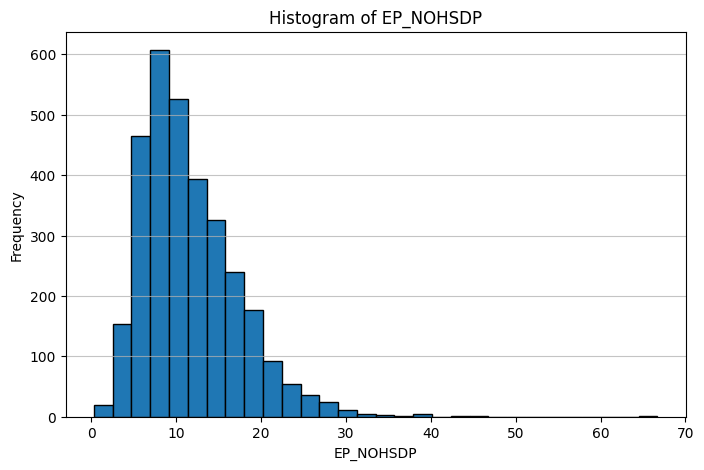

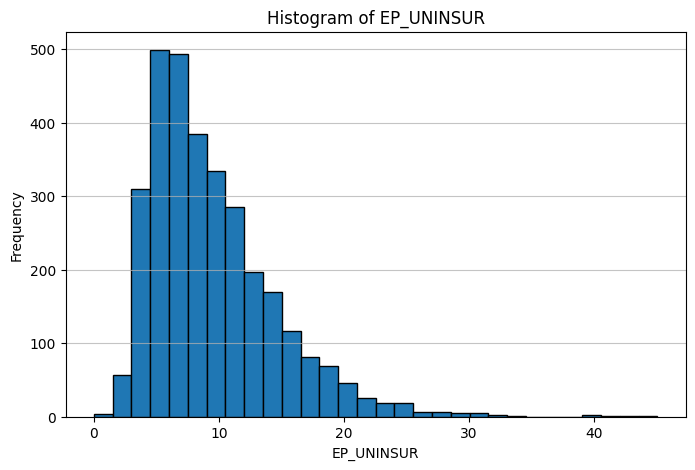

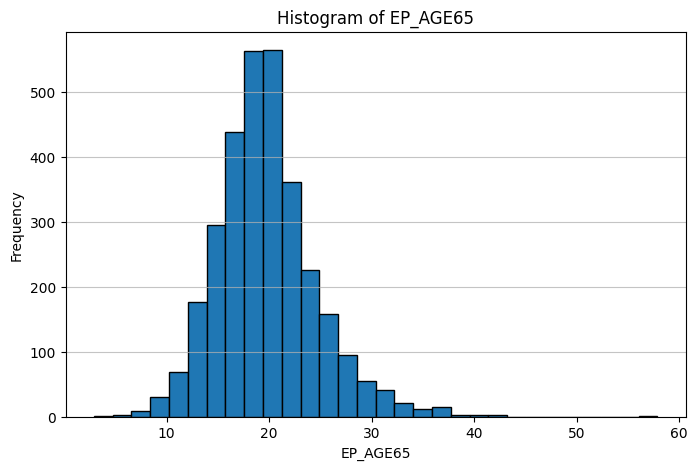

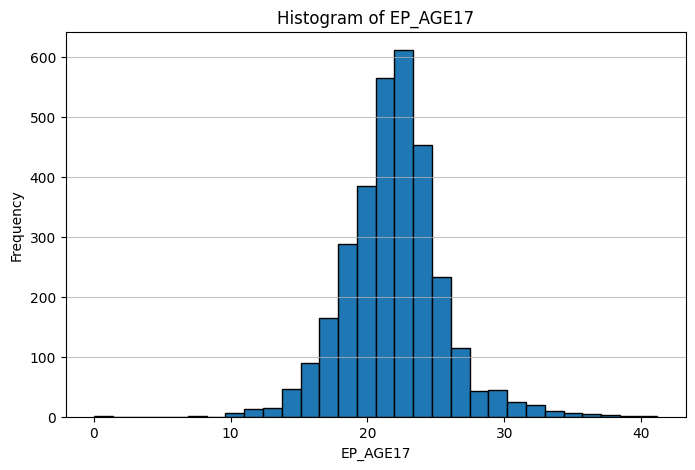

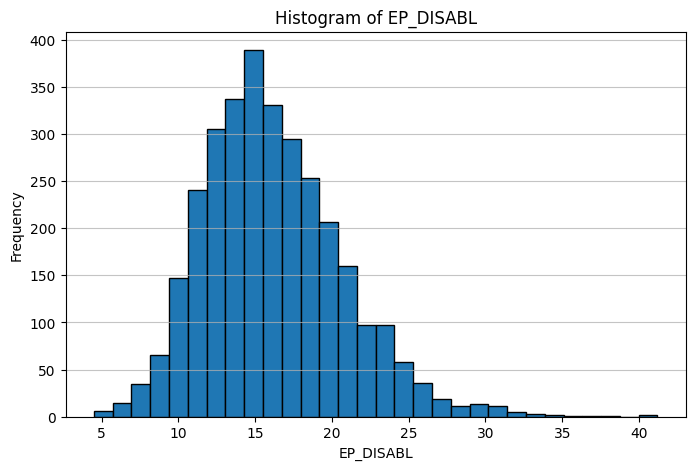

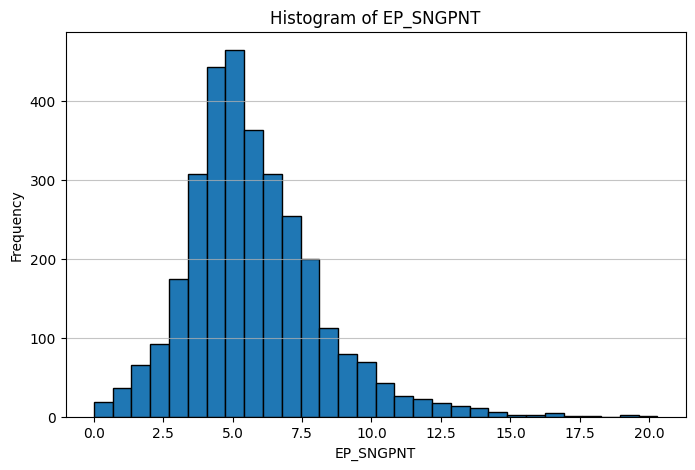

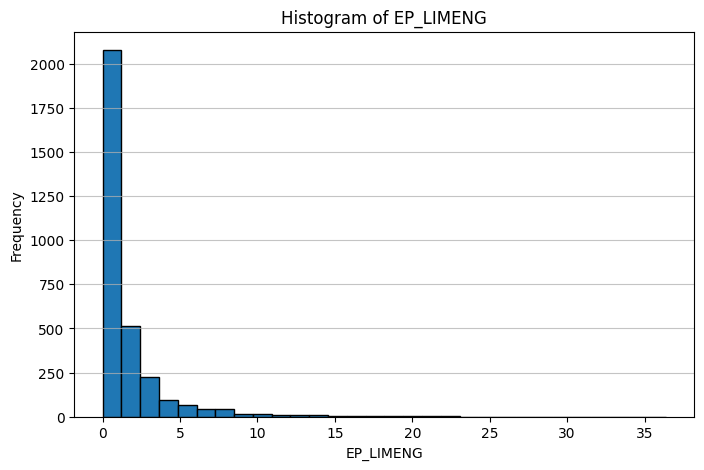

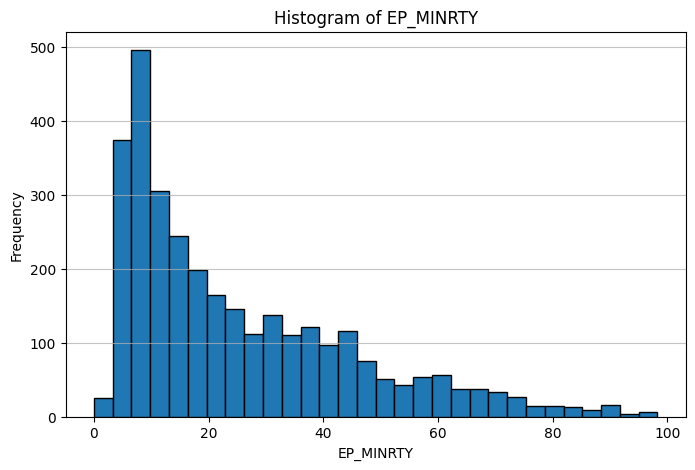

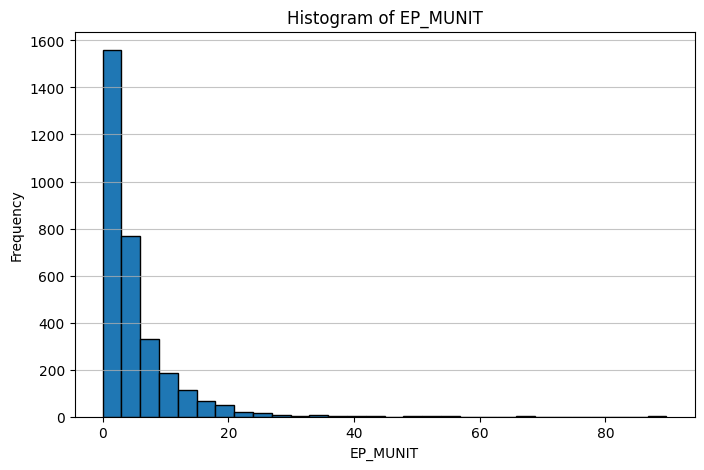

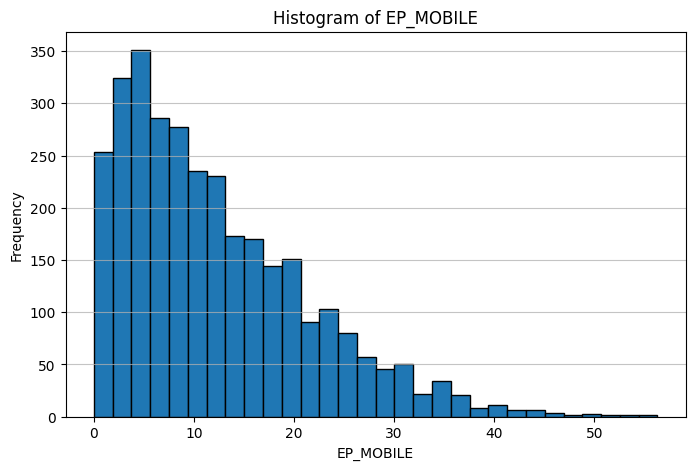

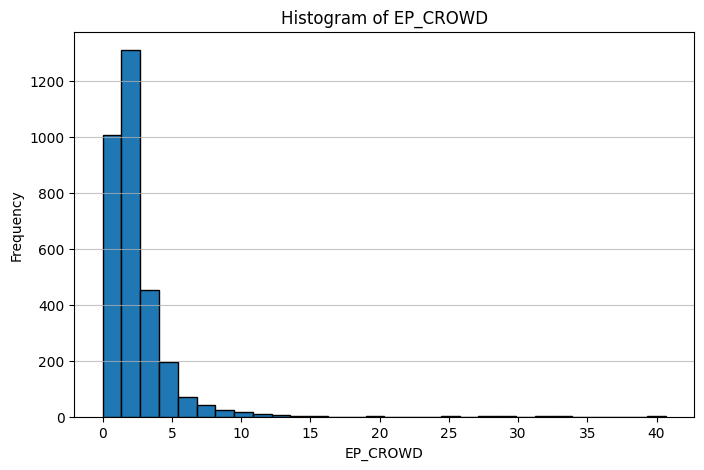

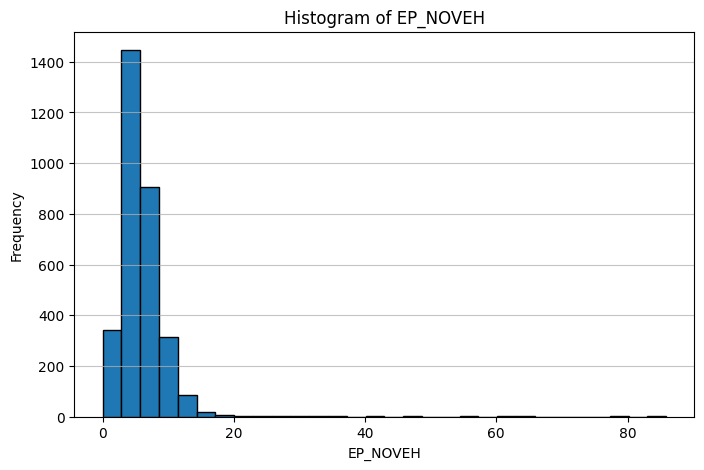

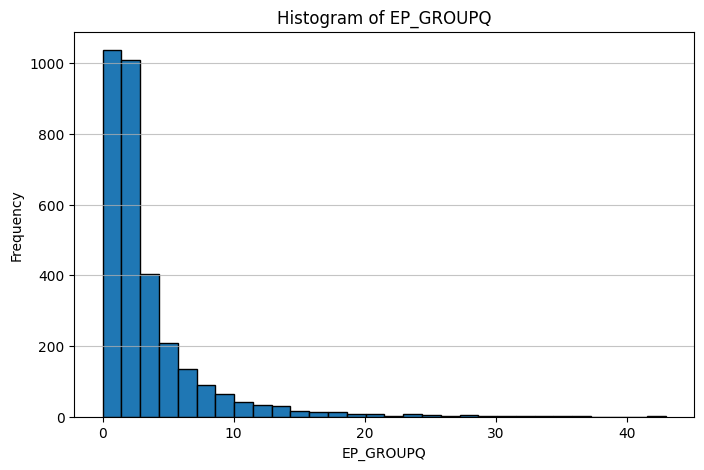

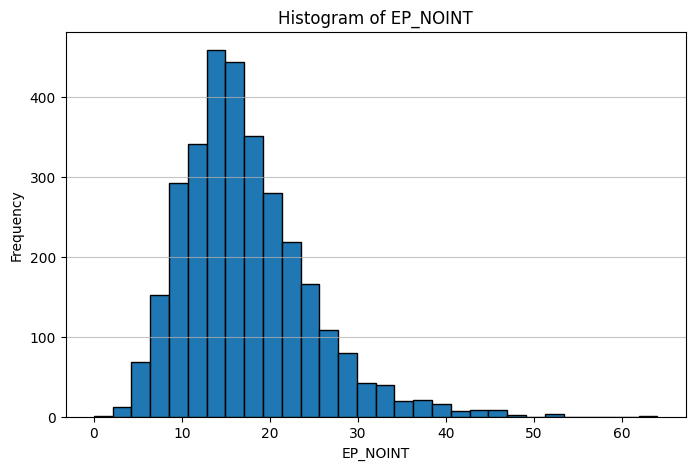

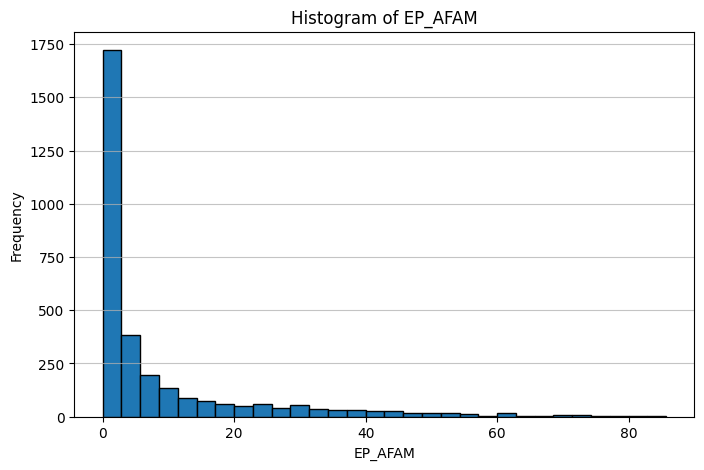

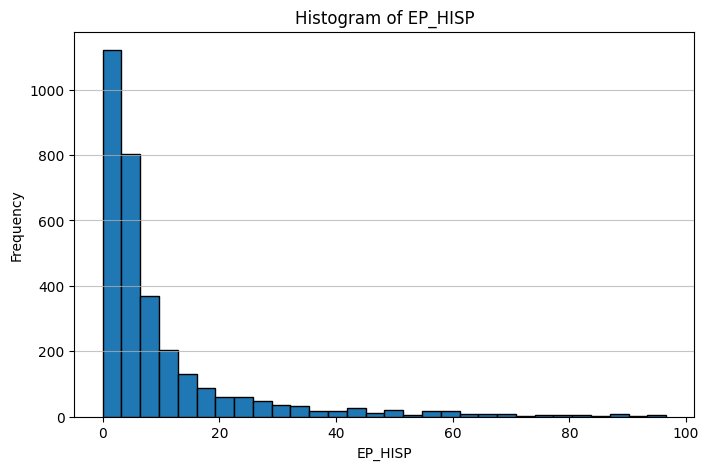

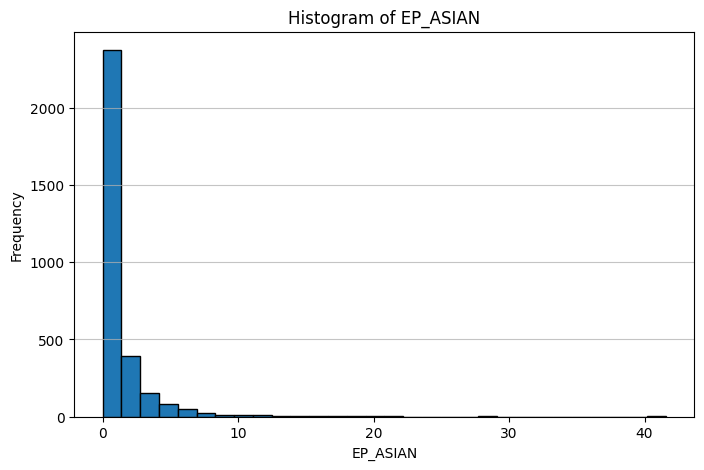

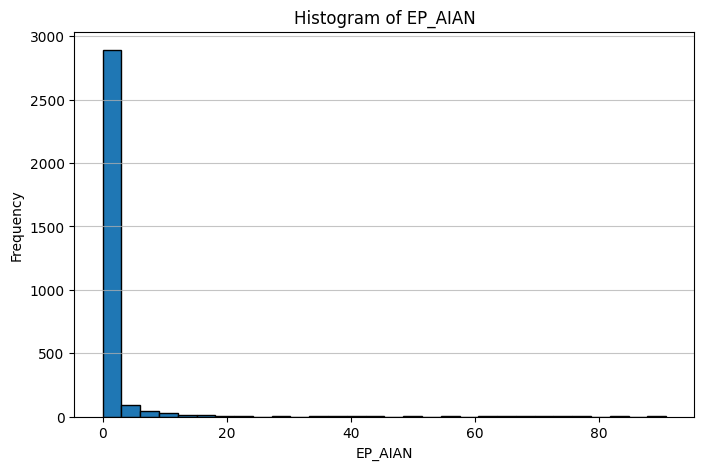

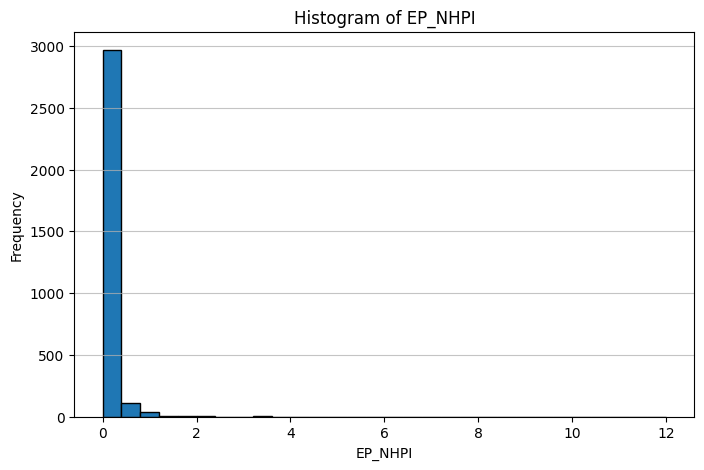

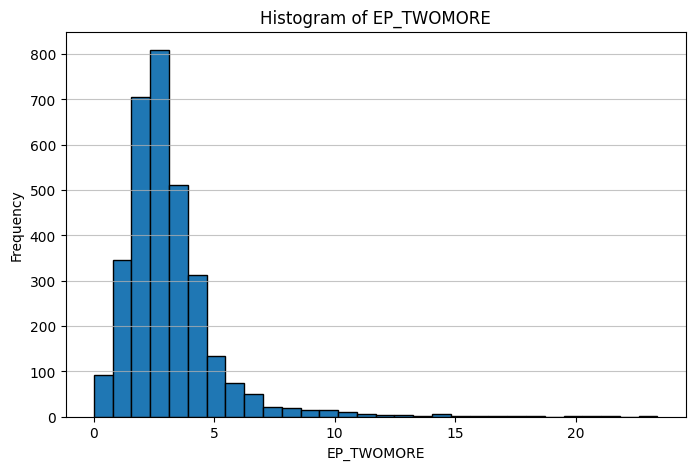

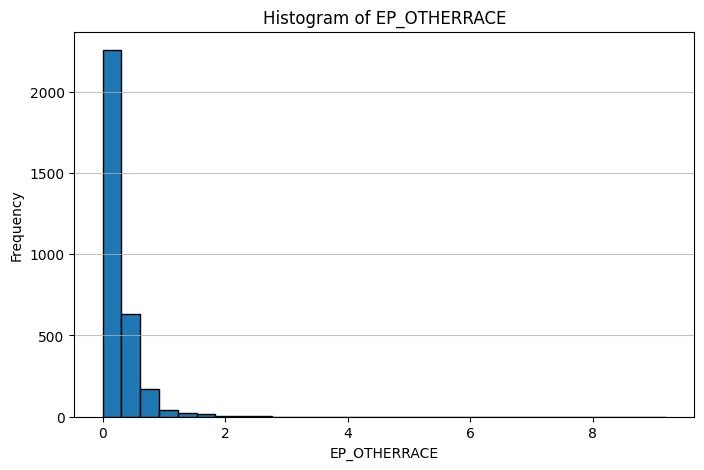

In [16]:
# Identify all numerical variables 
numerical_columns = nri_svi_merged.select_dtypes(include=['float64', 'int64']).columns

# Creating histogram for one variable
def plot_histogram(data, column_name, bins=30):
    plt.figure(figsize=(8, 5))
    plt.hist(data[column_name].dropna(), bins=bins, edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

# Looping through all numerical variables, creating histograms: 
for col in numerical_columns:
    plot_histogram(nri_svi_merged, col)

END OF HOMEWORK 2. 

In [22]:
import shutil
print(shutil.which("jupyter"))
print(shutil.which("nbconvert"))

import shutil
print(shutil.which("jupyter"))

c:\Users\nyager\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\Scripts\jupyter.EXE
None
c:\Users\nyager\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\Scripts\jupyter.EXE
